### Importing the required libraries

In [1]:
from sklearn.metrics import f1_score, classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree
from simple_colors import *
import seaborn as sns
import pandas as pd
import numpy as np
import re

### Reading dataset

In [2]:
iris_df = pd.read_csv('./Iris.csv')
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Exploratory Data Analysis

In [3]:
iris_df.shape

(150, 6)

##### This is to be inferred that the given dataset contains 150 rows and 6 columns.

#### The required split is done in order to train the data using decision tree classifier.

In [4]:
X = iris_df.drop(['Id', 'Species'], axis=1)
y = iris_df['Species']

In [5]:
iris_df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

##### From the above cell it is found that none of the columns in the given dataset contains the null value.

## Visualizing the raw dataset

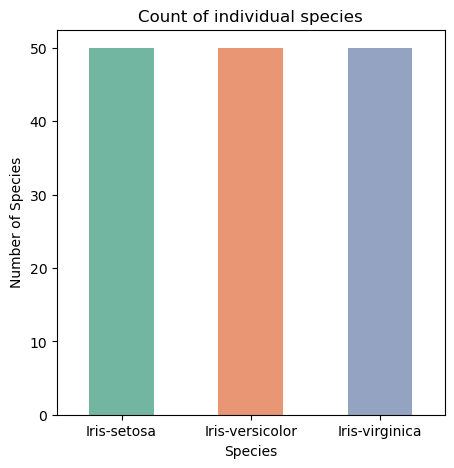

In [6]:
plt.figure(figsize=[5,5])
sns.countplot(data =iris_df, x = 'Species', palette=('Set2'), width=0.5)
plt.ylabel('Number of Species')
plt.title('Count of individual species')
plt.show()

### The inference from the above plot is discussed below,
* There are three classes (species) in as the target
* Each three classes (species) are in same size

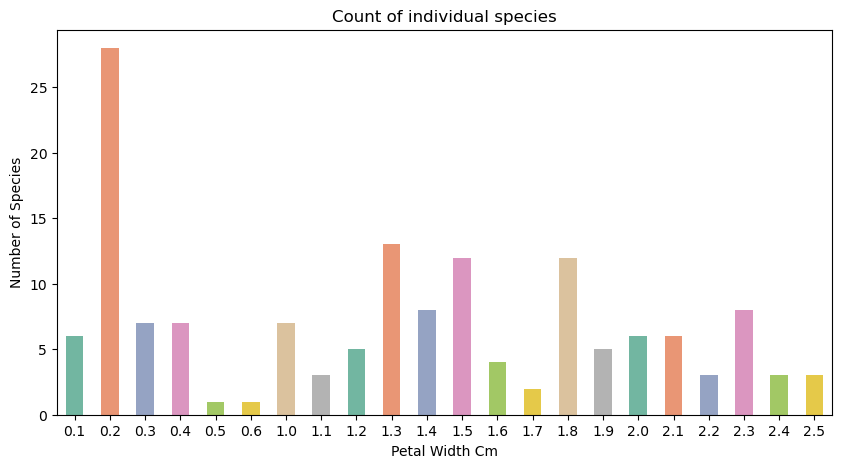

In [7]:
plt.figure(figsize=[10,5])
sns.countplot(data =iris_df, x = 'PetalWidthCm', palette=('Set2'), width=0.5)
plt.ylabel('Number of Species')
plt.xlabel('Petal Width Cm')
plt.title('Count of individual species')
plt.show()

### The inference from the above plot is discussed below,
* The petal width 0.2 has more count of flowers compared to the rest of the petal width.
* The petal width 0.5 has the least count of flowers compared to rest of the petal width.

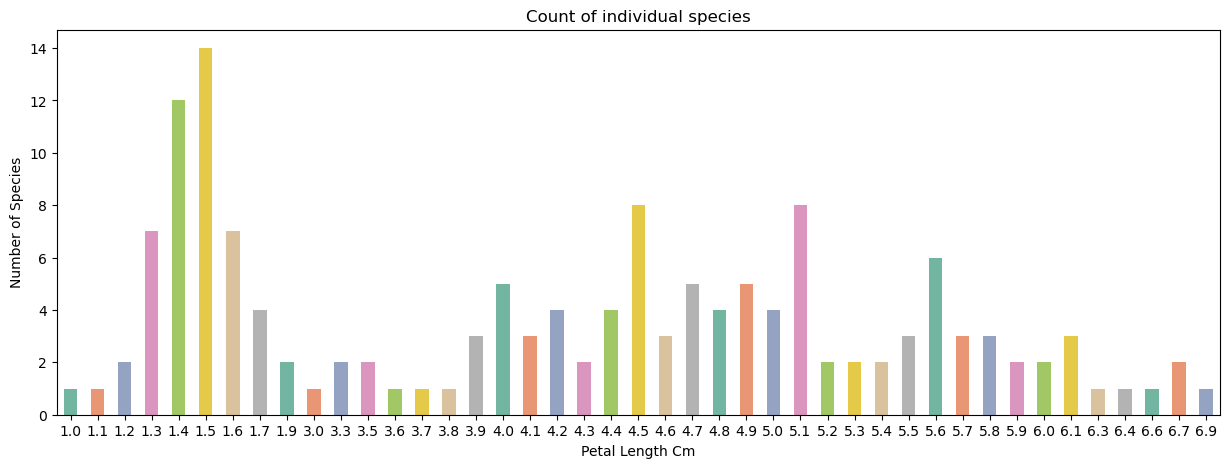

In [8]:
plt.figure(figsize=[15,5])
sns.countplot(data =iris_df, x = 'PetalLengthCm', palette=('Set2'), width=0.5)
plt.ylabel('Number of Species')
plt.xlabel('Petal Length Cm')
plt.title('Count of individual species')
plt.show()

### The inference from the above plot is discussed below,
* The petal length of 1.5 has more number of flowers in the given dataset.
* The petal length 1.0, 1.1, 3.0, 3.6, 3.7, 3.8, 6.3, 6.4, 6.6 has the least number of 1 species.

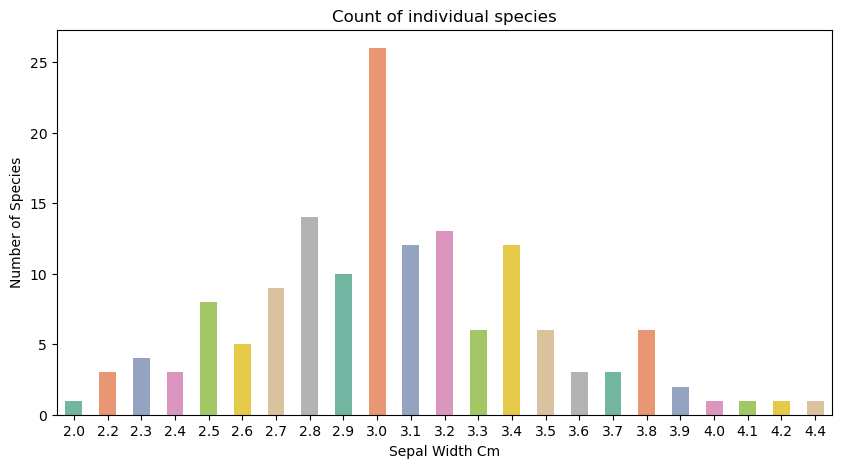

In [9]:
plt.figure(figsize=[10,5])
sns.countplot(data =iris_df, x = 'SepalWidthCm', palette=('Set2'), width=0.5)
plt.ylabel('Number of Species')
plt.xlabel('Sepal Width Cm')
plt.title('Count of individual species')
plt.show()

### The inference from theabove plot is discussed below,
* The more count of sepal width is about 3.0.
* There are more minimum number of count that is 1 for different sepal width, 2.0, 4.0, 4.1, 4.2, 4.4.

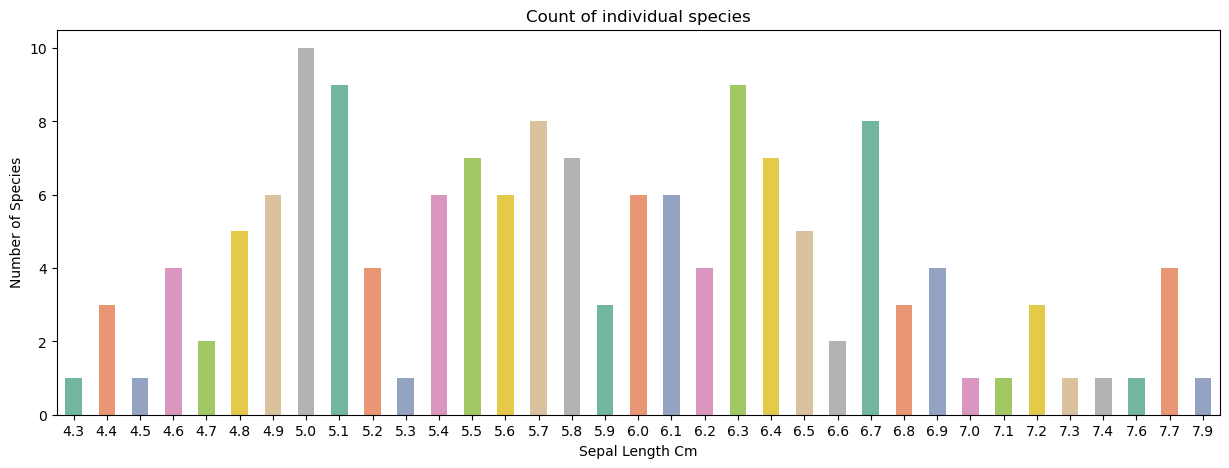

In [10]:
plt.figure(figsize=[15,5])
sns.countplot(data =iris_df, x = 'SepalLengthCm', palette=('Set2'), width=0.5)
plt.ylabel('Number of Species')
plt.xlabel('Sepal Length Cm')
plt.title('Count of individual species')
plt.show()

### The inference from theabove plot is discussed below,
* The more count of sepal length is about 5.0.
* There are more minimum number of count that is 1 for different sepal length, 4.3, 4.5, 5.3, 7.0, 7.1, 7.3, 7.4, 7.6, 7.9.

## Spliting the train and test data on basis of X and y

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47, stratify=y, test_size=0.2)

## Applying Decision Tree Classifier

In [12]:
dtc = DecisionTreeClassifier(criterion='entropy', random_state=43)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=43)

## Plotting the Decision Tree that separates the nodes for the given dataset

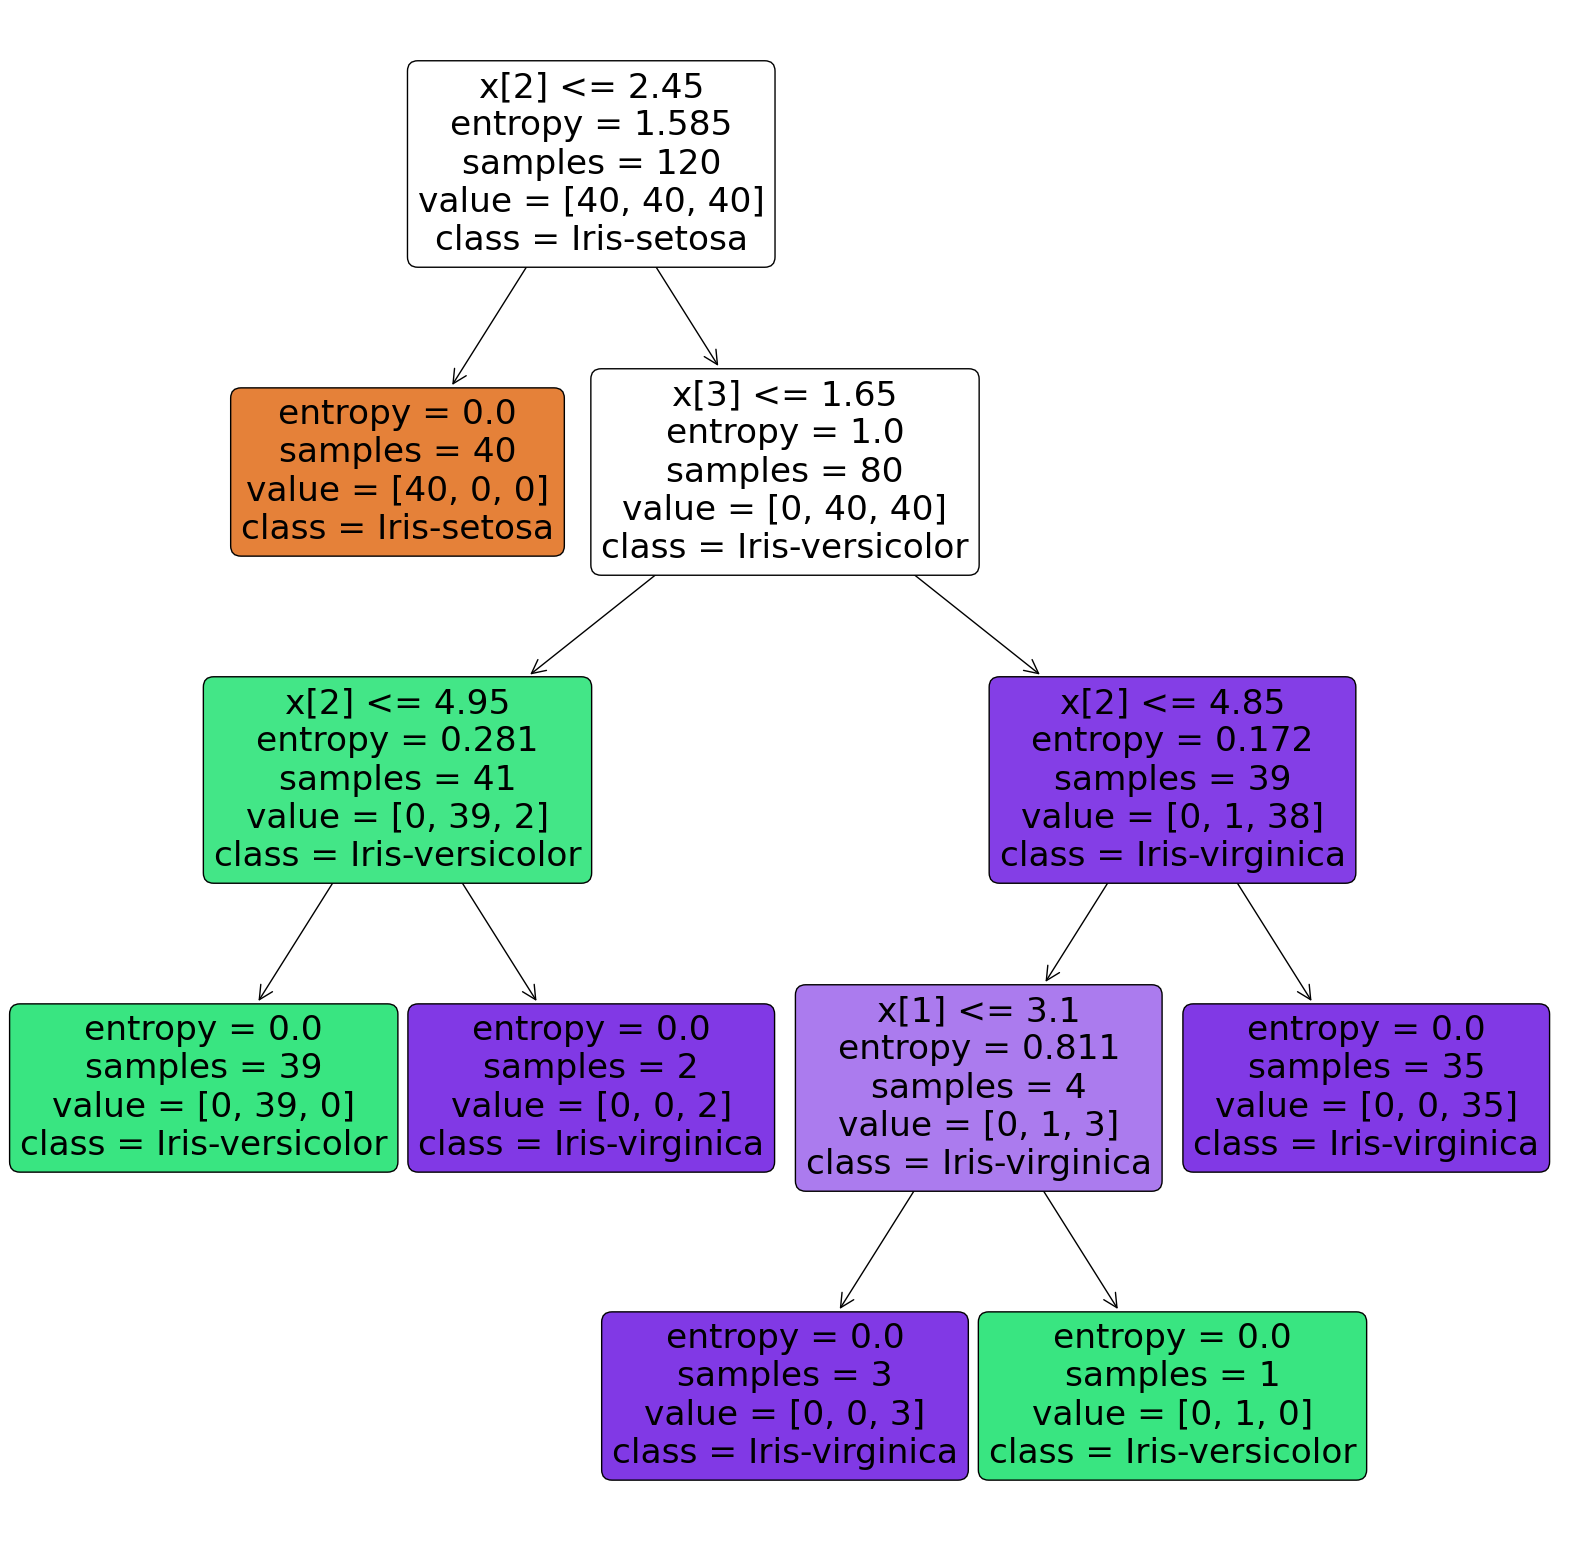

In [13]:
plt.figure(figsize=[20,20])
plot_tree(dtc, filled=True, rounded=True, class_names=iris_df['Species'].unique())
plt.show()

##### Predicting the X_train and X_test

In [14]:
ypred_test = dtc.predict(X_test)
ypred_train = dtc.predict(X_train)

## Metircs to evaluate the model

### Classification Report

##### Train data

In [15]:
print(classification_report(y_pred=ypred_train, y_true=y_train))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       1.00      1.00      1.00        40
 Iris-virginica       1.00      1.00      1.00        40

       accuracy                           1.00       120
      macro avg       1.00      1.00      1.00       120
   weighted avg       1.00      1.00      1.00       120



##### Test data

In [16]:
print(classification_report(y_pred=ypred_test, y_true=y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.80      0.89        10
 Iris-virginica       0.83      1.00      0.91        10

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



### Confusion matrix

##### Train data

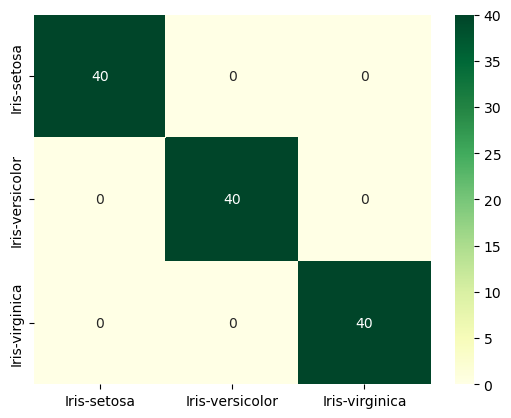

In [17]:
sns.heatmap(confusion_matrix(y_pred=ypred_train, y_true=y_train), annot=True, xticklabels=iris_df['Species'].unique(), yticklabels=iris_df['Species'].unique(), cmap='YlGn')
plt.show()

##### Test data

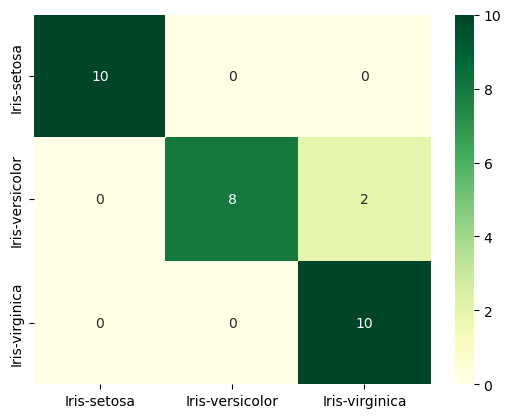

In [18]:
sns.heatmap(confusion_matrix(y_pred=ypred_test, y_true=y_test), annot=True, xticklabels=iris_df['Species'].unique(), yticklabels=iris_df['Species'].unique(), cmap='YlGn')
plt.show()

## Accuracy

##### Train data

In [19]:
print(f'The accuracy score of the train data is \u001b[1m{red(accuracy_score(y_pred=ypred_train, y_true=y_train))}\u001b[1m')

The accuracy score of the train data is 1.0


##### Test data

In [20]:
print(f'The accuracy score of the test data is \u001b[1m{red(accuracy_score(y_pred=ypred_test, y_true=y_test))}\u001b[1m')

The accuracy score of the test data is 0.9333333333333333


# Conclusion
* This model has good accuracy of 100% in train data.
* This model has better accuracy of 93.33% in test data.
* The high accuracy in train data and the less accuracy in test data is termed as Variance.
* Variance is quite commmon in Decision Tree algorithm.
* In order to reduce variance we will be using Random Forest algorithm.